In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
m = len(dataset)
m

768

In [6]:
dataset.shape

(768, 9)

In [7]:
#To split the data 80:20
from sklearn.model_selection import train_test_split

#So the train and test sets always have the same rows
np.random.seed(0)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2)
df_train.shape, df_test.shape

((614, 9), (154, 9))

In [8]:
#Creating the Training and Testing datasets
inputVars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X_train = df_train[inputVars]
X_test = df_test[inputVars]

Y_train = df_train['Outcome']
Y_test = df_test['Outcome']

X = dataset[inputVars]
Y = dataset['Outcome']

In [9]:
#Perform Scaling on our Training and Testing inputs

from sklearn.preprocessing import StandardScaler
scaleX = StandardScaler()
X_train_std = scaleX.fit_transform(X_train)
X_test_std = scaleX.fit_transform(X_test)

In [10]:
C = [10, 1, 0.1, 0.001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver ='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training Accuracy:', clf.score(X_train, Y_train))
    print('Test Accuracy:', clf.score(X_test, Y_test))
    print('')

C: 10
Training Accuracy: 0.7638436482084691
Test Accuracy: 0.8246753246753247

C: 1
Training Accuracy: 0.762214983713355
Test Accuracy: 0.8246753246753247

C: 0.1
Training Accuracy: 0.749185667752443
Test Accuracy: 0.8051948051948052

C: 0.001
Training Accuracy: 0.6384364820846905
Test Accuracy: 0.6883116883116883



In [11]:
#5 Folds selected
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
#Output accuracy and calculate mean and std across all folds
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 76.425% (3.278%)


In [12]:
#Construction of confusion matrix
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[98  9]
 [19 28]]


In [13]:
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



Text(0.5, 257.44, 'Predicted label')

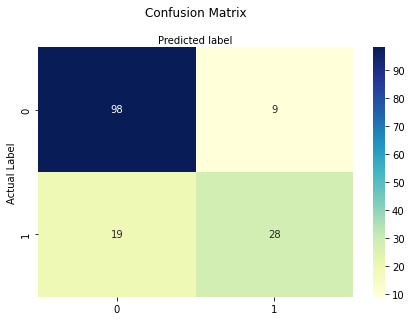

In [14]:
#Visualizing the results in a confusion matrix
#Visualize the confusion matrix using Heatmap
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names = [0,1] #Name of classes/outcomes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating the heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y =1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')

In [15]:
#KFOLD K = 10
#5 Folds selected
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)
#Output accuracy and calculate mean and std across all folds
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100, results.std()*100.0))

Accuracy: 76.818% (3.744%)


In [16]:
#Construction of confusion matrix
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[98  9]
 [19 28]]


In [17]:
test_size = 0.2
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



Text(0.5, 257.44, 'Predicted label')

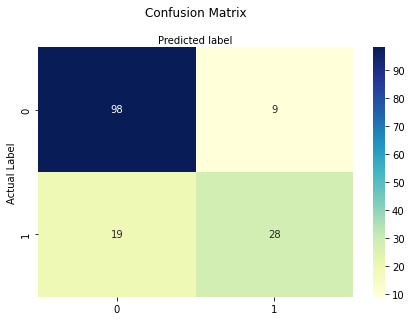

In [18]:
#Visualizing the results in a confusion matrix
#Visualize the confusion matrix using Heatmap
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names = [0,1] #Name of classes/outcomes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Creating the heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y =1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')